# Dispersion of a nanotube in vortex state

This notebook will calculate the dispersion relation of a nanotube with 60 nm outer and 40 nm inner diameters, permalloy material parameters. The obtained dispersion(s) must be equivalent to that(those) calculated analytically as well as with micromagnetic simulations published in: ```Jorge A. Otálora, Ming Yan, Helmut Schultheiss, Riccardo Hertel, and Attila Kákay, Phys. Rev. Lett. 117, 227203 (2016).```

First we need to import the ```TetraX``` package.
The ```%matplotlib notebook``` and ```import matplotlib.pyplot as plt``` are for plotting the obtained dispersions.

In [1]:
import tetrax as tx
%matplotlib notebook
import matplotlib.pyplot as plt

Here, we create a sample with permalloy like material parameters. By default the material parameters are set to those of permalloy. Each sample needs a geometry in the form of a mesh. We create a geometry with tubular cross section, 30nm outer and 20 nm inner radii. To do so, we use the ```tube_cross_section(r,R,lc,x0,y0)``` geometry function from the geometries module.

In [2]:
sample = tx.create_sample(name="Nanotube_20_30")
sample.Msat = 800e3
sample.Aex = 13e-12
sample.Didmi = 0
mesh = tx.geometries.tube_cross_section(20,30,lc=3)
sample.set_geom(mesh)

This sample does not have a mesh yet. You cannot set spatially dependent saturation for it.
This sample does not have a mesh yet. You cannot set spatially dependent exchange stiffness for it.
Setting geometry and calculating discretized differential operators on mesh.
Done.


The ```sample``` parameters, material and mesh, can be listed by typing ```sample```.

In [3]:
sample

Let's set an initial state and visualize it. 

In [4]:
sample.mag = tx.vectorfields.helical(sample.xyz, 60, 1)
sample.show()

/Users/attilak/anaconda3/lib/python3.10/site-packages/traittypes/traittypes.py:97: UserWarning: Given trait value dtype "float32" does not match required type "float32". A coerced copy has been created.
  warnings.warn(


Plot(antialias=3, axes=['x', 'y', 'z'], axes_helper=1.0, axes_helper_colors=[16711680, 65280, 255], background…

![Initial magnetization state](tube_ini_state.png)

Let's create an experiment, set a circular field of 80 mT and visualize it. Fields too must be given in SI units.

In [5]:
exp = tx.create_experimental_setup(sample)
Bphi = tx.vectorfields.helical(sample.xyz, 90, 1) * 0.08
exp.Bext =  Bphi
exp.show(scale=50)

Plot(antialias=3, axes=['x', 'y', 'z'], axes_helper=1.0, axes_helper_colors=[16711680, 65280, 255], background…

![External field](tube_ext_field.png)

Let's compute the equilibrium state and visualize it again.

In [6]:
exp.relax(tol=1e-13,continue_with_least_squares=True)
sample.show()

Minimizing in using 'L-BFGS-B' (tolerance 1e-13) ...
Current energy length density: -1.051136253830209e-22 J/m  mx = 0.00  my = -0.01  mz = -0.00
Relaxation with L-BFGS-B method was not succesful.

Minimizing in using SLSQP method (tolerance 1e-13) ...
Current energy length density: -1.051136252993404e-22 J/m  mx = 0.00  my = -0.01  mz = -0.00
Success!



Plot(antialias=3, axes=['x', 'y', 'z'], axes_helper=1.0, axes_helper_colors=[16711680, 65280, 255], background…

![Equilibrium state after relaxation](tube_eq_state.png)

We can now compute the dispersion relation for a set of wave vectors and number of modes (not, the computation of each wavevector ```k``` is done parallel. ```num_cpu=-1``` will involve all available CPU cores into the dispersion computation):

In [7]:
dispersion = exp.eigenmodes(num_cpus=-1,num_modes=10,kmin=-40e6,kmax=40e6,Nk=81)

100%|█████████████████████████████| 81/81 [00:22<00:00,  3.57it/s]


Let's plot the obtained dispersion, the first 5 or any number of modes. Here, we use transparency, thus the colour of the singlet solutions will be lighter compared to the dublets.

<IPython.core.display.Javascript object>


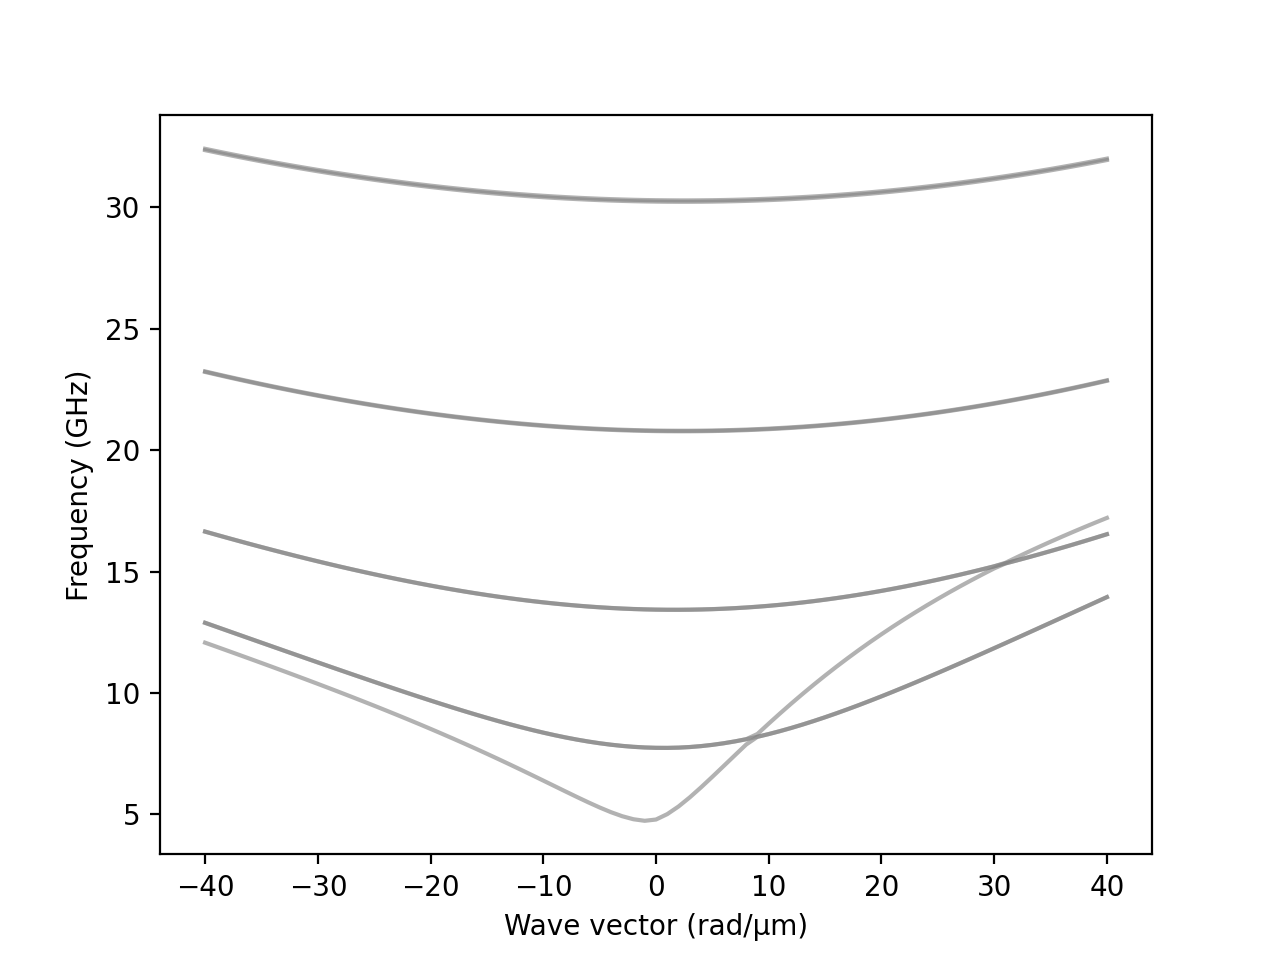

In [8]:
k_ = dispersion["k (rad/m)"]
plt.figure()
for i in range(9):
    plt.plot(k_*1e-6, dispersion[f"f{i} (GHz)"].values, ls="-", marker="", markersize=1, color="grey", alpha=0.6)
plt.xlabel("Wave vector (rad/µm)")
plt.ylabel("Frequency (GHz)")
plt.show()